In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
data = pd.read_csv("/content/drive/My Drive/SHIFT/comments.txt")
texts = [text for text in data]

In [0]:
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()
preprocess = lambda text: ' '.join(tokenizer.tokenize(text.lower()))

text = 'How to be a grown-up at work: replace "fuck you" with "Ok, great!".'
print("before:", text,)
print("after:", preprocess(text),)

before: How to be a grown-up at work: replace "fuck you" with "Ok, great!".
after: how to be a grown-up at work : replace " fuck you " with " ok , great ! " .


In [0]:
texts = [preprocess(x) for x in texts]

In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

### BagOfWords Vectorizer

In [0]:
count_vec = CountVectorizer()
text_bow = count_vec.fit_transform(texts)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_bow, target, test_size=0.5, random_state=17)

In [0]:
from sklearn.linear_model import LogisticRegression
bow_model = LogisticRegression(fit_intercept=False).fit(X_train, y_train)

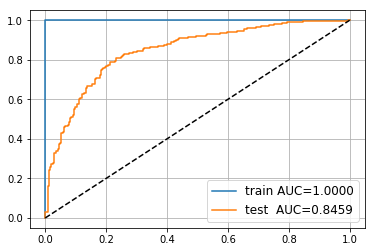

In [0]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

for name, X, y, model in [
    ('train', X_train, y_train, bow_model),
    ('test ', X_test, y_test, bow_model)
]:
    proba = model.predict_proba(X)[:, 1]
    auc = roc_auc_score(y, proba)
    plt.plot(*roc_curve(y, proba)[:2], label='%s AUC=%.4f' % (name, auc))

plt.plot([0, 1], [0, 1], '--', color='black',)
plt.legend(fontsize='large')
plt.grid()

In [0]:
accuracy_score(y_test, bow_model.predict(X_test))

0.784

### BagOfWords Vectorizer + TfIdf Transformer

In [0]:
count_vec = CountVectorizer()
text_bow = count_vec.fit_transform(texts)

In [0]:
tfidf_transformer = TfidfTransformer()
text_tfidf = tfidf_transformer.fit_transform(text_bow)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(text_tfidf, target, test_size=0.5, random_state=17)

In [0]:
tfidf_transform_model = LogisticRegression(fit_intercept=False).fit(X_train, y_train)

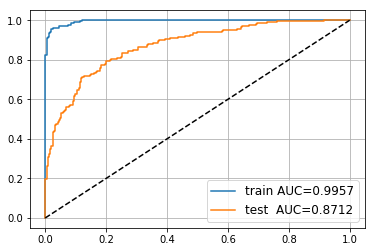

In [0]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

for name, X, y, model in [
    ('train', X_train, y_train, tfidf_transform_model),
    ('test ', X_test, y_test, tfidf_transform_model)
]:
    proba = model.predict_proba(X)[:, 1]
    auc = roc_auc_score(y, proba)
    plt.plot(*roc_curve(y, proba)[:2], label='%s AUC=%.4f' % (name, auc))

plt.plot([0, 1], [0, 1], '--', color='black',)
plt.legend(fontsize='large')
plt.grid()

In [0]:
accuracy_score(y_test, tfidf_transform_model.predict(X_test))

0.788

### TfIdf Vectorizer

In [0]:
tfidf_vec= TfidfVectorizer()
text_tfidf = tfidf_vec.fit_transform(texts)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(text_tfidf, target, test_size=0.5, random_state=17)

In [0]:
tfidf_model = LogisticRegression(fit_intercept=False).fit(X_train, y_train)

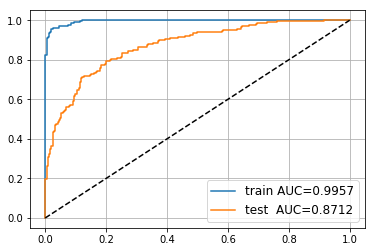

In [0]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

for name, X, y, model in [
    ('train', X_train, y_train, tfidf_model),
    ('test ', X_test, y_test, tfidf_model)
]:
    proba = model.predict_proba(X)[:, 1]
    auc = roc_auc_score(y, proba)
    plt.plot(*roc_curve(y, proba)[:2], label='%s AUC=%.4f' % (name, auc))

plt.plot([0, 1], [0, 1], '--', color='black',)
plt.legend(fontsize='large')
plt.grid()

In [0]:
accuracy_score(y_test, tfidf_model.predict(X_test))

0.788

### Предикт собственных предложений (на примере обученных TfIdf Vectorizer и tfidf_model)

In [0]:
sent = ["Wikipedia was launched on January 15, 2001, by Jimmy Wales and Larry Sanger"]

In [0]:
sent = [preprocess(x) for x in sent]

In [0]:
sent_tfidf = tfidf_vec.transform(sent)

In [0]:
tfidf_model.predict(sent_tfidf)

array([0])

In [0]:
tfidf_model.predict_proba(sent_tfidf)

array([[0.55251301, 0.44748699]])

### Сохранение и загрузка обученных моделей

In [0]:
import pickle

In [0]:
with open('model.pkl', 'wb') as f:
  pickle.dump(tfidf_model, f)

In [0]:
with open('model.pkl', 'rb') as f:
  model = pickle.load(f)

In [0]:
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)